# Домашнее задание 4

## Задача 1
Постройте график<br>
Назовите график<br>
Сделайте именование оси x и оси y<br>
Сделайте выводы<br>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

### Скачиваем данные

In [2]:
house_data_df = pd.read_csv(r'C:\temp\kc-house-data (1).csv', encoding='ISO-8859-1')
laptop_data_df = pd.read_csv(r'C:\temp\laptop_price (1).csv', encoding='ISO-8859-1')

### Изучаем стоимости недвижимости

In [6]:
house_data_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


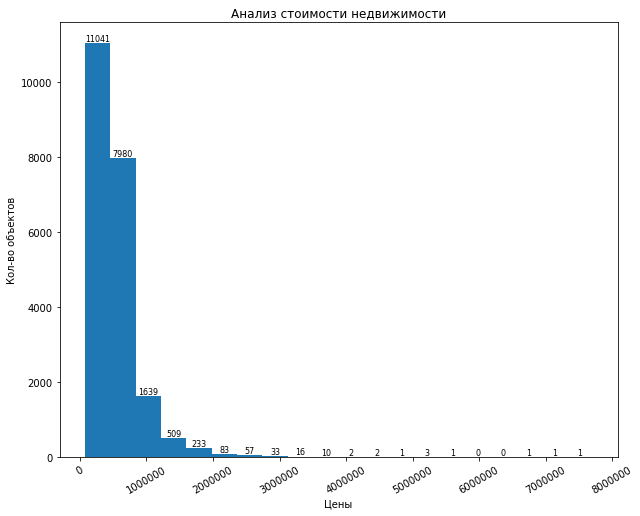

In [33]:
plt.figure(figsize=(10, 8))
_, _, bars = plt.hist(house_data_df['price'], bins=20)

plt.ticklabel_format(useOffset=False, style='plain')

plt.bar_label(bars, fontsize=8)

plt.title('Анализ стоимости недвижимости')
plt.xlabel('Цены')
plt.xticks(rotation=30)
plt.ylabel('Кол-во объектов');

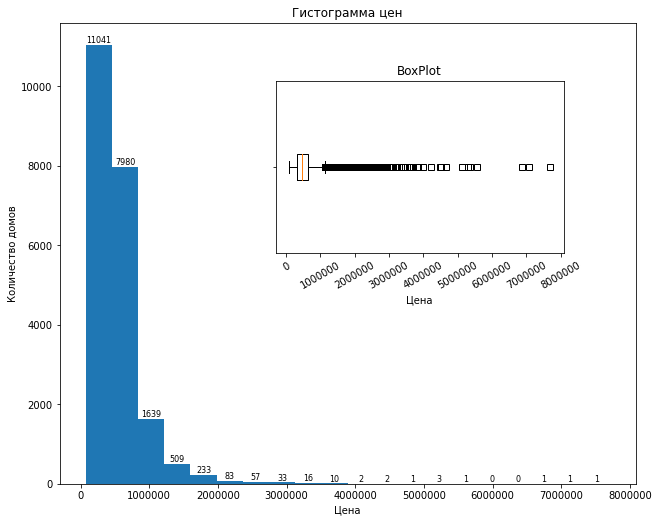

In [76]:
fig = plt.figure(figsize=(10, 8))

axes1 = fig.add_axes([0.1,0.1,0.8,0.8])
axes2 = fig.add_axes([0.4, 0.5, 0.4, 0.3])

axes1.bar_label(bars, fontsize=8)
axes1.ticklabel_format(useOffset=False, style='plain')

axes1.set_xlabel('Цена')
axes1.set_ylabel('Количество домов')
axes1.set_title('Гистограмма цен')

axes2.set_xlabel('Цена')
axes2.tick_params(labelleft=False, rotation=30)
axes2.set_title('BoxPlot')

axes2.ticklabel_format(useOffset=False, style='plain')


axes1.hist(house_data_df['price'], bins=20)
axes2.boxplot(house_data_df['price'],0,'s',0);

## Выводы
- в Калифорнии довольно много *относительно* дешевых домов, но все они мне не по-карману.
- на удивление мало супер дорогих домов: буквально единицы все, что больше 4000000. А где же дома всех кинозвезд и воротил силиконовой долины??